In [1]:
%%time
import warnings

import proplot as plot
import sys
import glob
import cmaps
import pandas as pd
import numpy as np
import salem
import xarray as xr

import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import ticker, cm


from getchinamap.getchinamap import DownloadChmap
chinamap_engine = DownloadChmap()#(adcode_file='/home/xuejingkai/data/down/AMap_adcode_citycode_20210406.csv')
provinces = chinamap_engine.download_country(target='省')





import warnings
warnings.filterwarnings("ignore")
plot.rc['figure.facecolor'] = 'white'

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1.87 s, sys: 854 ms, total: 2.72 s
Wall time: 3.02 s


In [2]:
timedt=pd.date_range('20240101','20240102',freq='1D')

In [3]:
L=[glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{t.strftime("%Y%m%d")}*')[0] for t in timedt]

In [4]:
# #L=glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{timedt[0].strftime("%Y%m%d")}*')
# L=[glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{t.strftime("%Y%m%d")}*')[0] for t in timedt]
# L.sort()
# sites=pd.read_excel('/exports/d4/xuejingkai/guokongzhan_nc/sites.xlsx')
# sites.columns=['id','name','city','lon','lat','p']
# sites['lon'] = sites['lon'].replace('-', np.nan)
# sites.dropna(subset=['lon'], inplace=True)
# sites['lat']=sites.lat.astype(float)

# D=[]
# times=[]
# for l in L[:]:
    
#     df=pd.read_csv(l)
#     # 将"date"列转换为字符串，并保留8个字符（年月日）
#     #df["date"] = df["date"].astype(str).str[:8]

#     # 将"hour"列转换为字符串，并保留2个字符（小时）
#     #df["hour"] = df["hour"].astype(str).str.zfill(2)

#     # 将"date"和"hour"列相加，并使用to_datetime函数将其转换为datetime格式
#     df["date"] = pd.to_datetime(df["date"].astype(str).str[:8] + df["hour"].astype(str).str.zfill(2), format="%Y%m%d%H")
#     for n in range(23,24):  #一般是23点的O3是当天的O3_8h_24h
#         try:
#             dfq=df.query(f"type == 'O3_8h_24h' and hour == {df.hour.max()}")
#             timedt0=dfq['date']
#             timedt0=pd.to_datetime(timedt0.values[0])
#             d1=dfq.T.reset_index().iloc[3:]
#             #d2.rename({'index':'h'})
#             d1.columns=['id','value']
#             d1['value']=d1.value.astype(float)
#             d2=pd.merge(sites,d1,how='left')

#             lat=d2.lat.values
#             lon=d2.lon.values
#             vcd=d2.value.values
#             slat=d2.lat.values
#             slon=d2.lon.values
#             D.append(vcd)
#             times.append(timedt0)
#             print(l)
#         except:
#             pass

In [5]:
#L=glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{timedt[0].strftime("%Y%m%d")}*')
L=[glob.glob(f'/exports/d4/xuejingkai/down/guokongzhandian/china_sites_{t.strftime("%Y%m%d")}*')[0] for t in timedt]
L.sort()
sites=pd.read_excel('/exports/d4/xuejingkai/guokongzhan_nc/sites.xlsx')
sites.columns=['id','name','city','lon','lat','p']
sites['lon'] = sites['lon'].replace('-', np.nan)
sites.dropna(subset=['lon'], inplace=True)
sites['lat']=sites.lat.astype(float)

D=[]
times=[]
for l in L[:]:
    
    df=pd.read_csv(l)
    # 将"date"列转换为字符串，并保留8个字符（年月日）
    #df["date"] = df["date"].astype(str).str[:8]

    # 将"hour"列转换为字符串，并保留2个字符（小时）
    #df["hour"] = df["hour"].astype(str).str.zfill(2)

    # 将"date"和"hour"列相加，并使用to_datetime函数将其转换为datetime格式
    df["date"] = pd.to_datetime(df["date"].astype(str).str[:8] + df["hour"].astype(str).str.zfill(2), format="%Y%m%d%H")
    for n in range(0,24):  #一般是23点的O3是当天的O3_8h_24h
        try:
            dfq=df.query(f"type == 'PM10' and hour == {n}")
            timedt0=dfq['date']
            timedt0=pd.to_datetime(timedt0.values[0])
            d1=dfq.T.reset_index().iloc[3:]
            #d2.rename({'index':'h'})
            d1.columns=['id','value']
            d1['value']=d1.value.astype(float)
            d2=pd.merge(sites,d1,how='left')

            lat=d2.lat.values
            lon=d2.lon.values
            vcd=d2.value.values
            slat=d2.lat.values
            slon=d2.lon.values
            D.append(vcd)
            times.append(timedt0)
            print(l,'  hour:',n)
        except:
            pass

/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 0
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 1
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 2
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 3
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 4
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 5
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 6
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 7
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 8
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 9
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 10
/exports/d4/xuejingkai/down/guokongzhandian/china_sites_20240101.csv   hour: 11
/exports/d4/xuejingkai/down/guokongzhandian/china_

In [6]:
dss=xr.DataArray(np.array(D)
                    ,
        coords={
            'time':times,#times,#timedt[n1:n2],
            'point':np.arange(np.array(D).shape[1]),


        },
        dims=['time','point'])

In [7]:
Dss=dss.to_dataset(name='c')

Dss['lat'] = (('point',), d2.lat)
Dss['lon'] = (('point',), d2.lon)

In [8]:
Dss

<xarray.Dataset>
Dimensions:  (time: 48, point: 2016)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 ... 2024-01-02T23:00:00
  * point    (point) int64 0 1 2 3 4 5 6 ... 2009 2010 2011 2012 2013 2014 2015
Data variables:
    c        (time, point) float64 49.0 28.0 72.0 52.0 ... 263.0 271.0 56.0
    lat      (point) float64 39.88 40.29 39.93 39.89 ... 35.03 36.77 40.66 36.51
    lon      (point) float64 116.4 116.2 116.4 116.4 ... 118.4 119.2 122.2 102.1

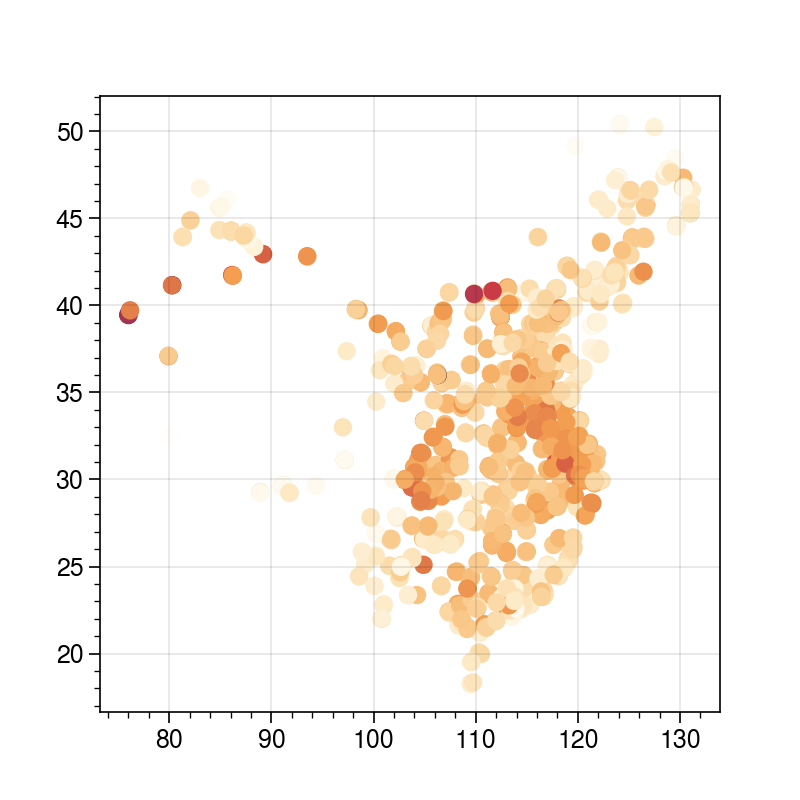

In [9]:
plt.scatter(Dss.lon,Dss.lat,c=Dss.c[0])

In [22]:
import numpy as np
import xarray as xr

# 定义经纬度范围
lon = np.arange(80, 140,0.2)  # 例如从100°E到120°E，分成50个点
lat = np.arange(20, 60, 0.2)    # 例如从20°N到40°N，分成30个点

# 生成随机数据
data = np.full((len(lat), len(lon)),np.nan)  # 大小为 (lat, lon)

# 创建一个 xarray DataArray
dstemp = xr.DataArray(data, 
                          coords={'lat': lat, 'lon': lon}, 
                          dims=['lat', 'lon'], 
                          name='dstemp')

dstemp 


<xarray.DataArray 'dstemp' (lat: 200, lon: 300)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 20.0 20.2 20.4 20.6 20.8 ... 59.0 59.2 59.4 59.6 59.8
  * lon      (lon) float64 80.0 80.2 80.4 80.6 80.8 ... 139.2 139.4 139.6 139.8

In [33]:
# 定义经纬度范围
lon = np.arange(80, 140,0.2)  # 例如从100°E到120°E，分成50个点
lat = np.arange(20, 60, 0.2)    # 例如从20°N到40°N，分成30个点

# 定义时间维度，1 小时频率，从 2024-01-01 到 2024-01-05
time = pd.date_range('2024-01-01', '2024-01-02', freq='1H')

# 生成随机数据，数据大小为 (时间, 纬度, 经度)
data = np.random.rand(len(time), len(lat), len(lon))

# 创建一个 xarray DataArray，包含时间、纬度和经度
dspred = xr.DataArray(data, 
                          coords={'time': time, 'lat': lat, 'lon': lon}, 
                          dims=['time', 'lat', 'lon'], 
                          name='random_data')

dspred

<xarray.DataArray 'random_data' (time: 25, lat: 200, lon: 300)>
array([[[0.58306895, 0.89689631, 0.9637159 , ..., 0.95514166,
         0.56327264, 0.88194912],
        [0.91348281, 0.81313667, 0.54342915, ..., 0.15515979,
         0.99576906, 0.98561262],
        [0.51785201, 0.12260406, 0.48123699, ..., 0.69087278,
         0.07149597, 0.6591239 ],
        ...,
        [0.26463206, 0.48345431, 0.5136062 , ..., 0.15765791,
         0.27837659, 0.96248451],
        [0.45114488, 0.46012199, 0.94300064, ..., 0.52183468,
         0.95946146, 0.93688643],
        [0.23883549, 0.13021039, 0.91995392, ..., 0.96090563,
         0.26284885, 0.33190806]],

       [[0.60097816, 0.03713862, 0.25497976, ..., 0.16130851,
         0.09510052, 0.66112642],
        [0.4561247 , 0.03299753, 0.28301395, ..., 0.40416811,
         0.62562097, 0.82505394],
        [0.06357989, 0.47247211, 0.44253275, ..., 0.58168103,
         0.20268006, 0.44255636],
...
        [0.73372581, 0.39568357, 0.05499724, ..., 0.3976773 ,
         0.123971  , 0.15135663],
        [0.72793464, 0.34616904, 0.88823592, ..., 0.01449293,
         0.166857  , 0.47648525],
        [0.18968513, 0.31701866, 0.0286512 , ..., 0.81983812,
         0.95291693, 0.11557284]],

       [[0.81904375, 0.44149411, 0.1457184 , ..., 0.96980313,
         0.86516942, 0.21033497],
        [0.27182581, 0.09328096, 0.57835196, ..., 0.84415926,
         0.46826959, 0.43996525],
        [0.63027449, 0.8039534 , 0.09105773, ..., 0.12110523,
         0.87748747, 0.8329081 ],
        ...,
        [0.71169729, 0.28461979, 0.15759044, ..., 0.48455657,
         0.2424354 , 0.83184816],
        [0.13676196, 0.66317843, 0.04800316, ..., 0.50201232,
         0.75635377, 0.79807323],
        [0.6953923 , 0.12508861, 0.27339259, ..., 0.8658732 ,
         0.06305083, 0.61345238]]])
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-01T01:00:00 ... 2024-01-02
  * lat      (lat) float64 20.0 20.2 20.4 20.6 20.8 ... 59.0 59.2 59.4 59.6 59.8
  * lon      (lon) float64 80.0 80.2 80.4 80.6 80.8 ... 139.2 139.4 139.6 139.8

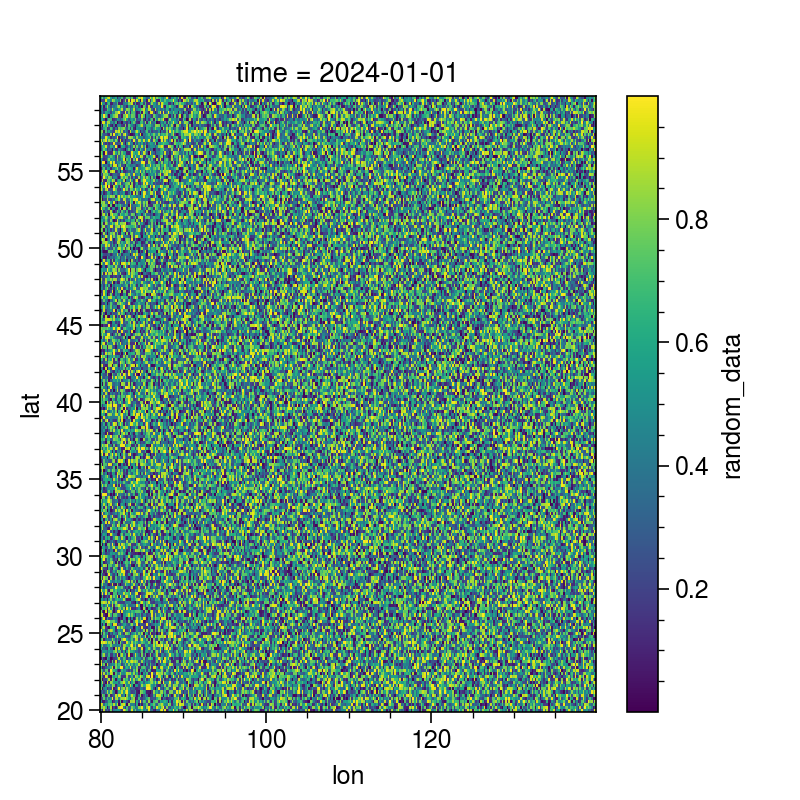

In [26]:
dspred[0].plot()

In [27]:
Dss

<xarray.Dataset>
Dimensions:  (time: 48, point: 2016)
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 ... 2024-01-02T23:00:00
  * point    (point) int64 0 1 2 3 4 5 6 ... 2009 2010 2011 2012 2013 2014 2015
Data variables:
    c        (time, point) float64 49.0 28.0 72.0 52.0 ... 263.0 271.0 56.0
    lat      (point) float64 39.88 40.29 39.93 39.89 ... 35.03 36.77 40.66 36.51
    lon      (point) float64 116.4 116.2 116.4 116.4 ... 118.4 119.2 122.2 102.1

In [30]:


dspred2=dspred.interp(lon=Dss.lon,lat=Dss.lat)  # 插值到散点

In [34]:
dspred2

<xarray.DataArray 'random_data' (time: 25, point: 2016)>
array([[0.62706763, 0.6120858 , 0.66311303, ..., 0.12978111, 0.24529915,
        0.34702168],
       [0.34604329, 0.6057089 , 0.3785711 , ..., 0.03758578, 0.08869047,
        0.4865718 ],
       [0.40922173, 0.22748688, 0.48177678, ..., 0.03548094, 0.75778547,
        0.55117093],
       ...,
       [0.55115732, 0.28780374, 0.36137095, ..., 0.75458898, 0.33194457,
        0.58270155],
       [0.67286847, 0.85610214, 0.7794916 , ..., 0.7485051 , 0.67988874,
        0.41310721],
       [0.93577394, 0.36431177, 0.91268267, ..., 0.16016135, 0.62392264,
        0.40960265]])
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 2024-01-01T01:00:00 ... 2024-01-02
    lon      (point) float64 116.4 116.2 116.4 116.4 ... 118.4 119.2 122.2 102.1
    lat      (point) float64 39.88 40.29 39.93 39.89 ... 35.03 36.77 40.66 36.51
  * point    (point) int64 0 1 2 3 4 5 6 ... 2009 2010 2011 2012 2013 2014 2015

In [35]:
Dss.c

<xarray.DataArray 'c' (time: 48, point: 2016)>
array([[ 49.,  28.,  72., ...,  70.,  52.,  85.],
       [ 76.,  26.,  85., ...,  73.,  58.,  87.],
       [ 88.,  25.,  97., ...,  61.,  58.,  77.],
       ...,
       [ 52.,   7.,  17., ..., 259., 197.,  74.],
       [ 14.,   7.,   9., ..., 261., 254.,  75.],
       [  7.,   7.,   8., ..., 263., 271.,  56.]])
Coordinates:
  * time     (time) datetime64[ns] 2024-01-01 ... 2024-01-02T23:00:00
  * point    (point) int64 0 1 2 3 4 5 6 ... 2009 2010 2011 2012 2013 2014 2015

In [ ]:
#Dss.c和dspred2可以相互比较了